## 📚 Giới thiệu các thư viện sử dụng

- **pandas**: Dùng để xử lý và phân tích dữ liệu dạng bảng (DataFrame), hỗ trợ đọc/ghi file CSV, Excel, v.v.  
- **numpy**: Hỗ trợ tính toán số học hiệu năng cao, đặc biệt với mảng (array) và ma trận.  
- **os**: Làm việc với hệ thống tệp — quản lý đường dẫn, kiểm tra file, thư mục, v.v.  
- **matplotlib.pyplot**: Thư viện vẽ biểu đồ, trực quan hóa dữ liệu dưới dạng đồ thị, histogram, scatter plot, v.v.  
- **collections.Counter**: Dùng để đếm tần suất xuất hiện của các phần tử trong danh sách.  
- **sklearn.preprocessing.MinMaxScaler**: Chuẩn hóa dữ liệu về cùng một khoảng (thường là [0, 1]) để giúp mô hình học máy hoạt động hiệu quả hơn.


In [34]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

## 🌸 Chuẩn hóa dữ liệu Iris với 2 đặc trưng mới

Trong bước này, ta sẽ xử lý bộ dữ liệu **Iris** ban đầu để tạo ra phiên bản rút gọn và chuẩn hóa:
1. **Đọc dữ liệu gốc** từ file `Iris.csv`.  
2. **Chọn các đặc trưng** (bỏ cột `Id` và `Species`).  
3. **Tạo 2 đặc trưng mới**:  
   - `Feature1`: nhân *SepalLengthCm* và *SepalWidthCm*.  
   - `Feature2`: nhân *PetalLengthCm* và *PetalWidthCm*.  
   Cách làm này giúp đơn giản hóa không gian đặc trưng từ 4 chiều xuống 2 chiều, thuận tiện cho trực quan hóa và thử nghiệm.  
4. **Chuẩn hóa dữ liệu** về khoảng `[0, 1]` bằng `MinMaxScaler` để đảm bảo các đặc trưng có cùng tỷ lệ.  
5. **Lưu dữ liệu đã chuẩn hóa** thành file `Iris_2features_normalized.csv`.

Sau bước này, ta thu được tập dữ liệu gồm 3 cột:
- `Id`: mã số mẫu.  
- `Feature1`, `Feature2`: hai đặc trưng đã chuẩn hóa.  
- `Species`: nhãn loài hoa.


In [35]:

# 1. Đọc dữ liệu từ file gốc
df = pd.read_csv('Iris.csv')

# 2. Lấy 4 đặc trưng gốc (bỏ Id, Species)
features = df.drop(columns=['Id', 'Species'])

# 3. Biến 4 đặc trưng thành 2 đặc trưng (ví dụ ghép cặp hoặc kết hợp tuyến tính)
# Ở đây ta lấy trung bình 2 nhóm làm ví dụ
df['Feature1'] = (df['SepalLengthCm'] * df['SepalWidthCm']) 
df['Feature2'] = (df['PetalLengthCm'] * df['PetalWidthCm']) 

# 4. Chỉ lấy 2 đặc trưng mới để chuẩn hóa
features_2d = df[['Feature1', 'Feature2']]

# 5. Chuẩn hóa dữ liệu về khoảng [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features_2d)

# 6. Tạo DataFrame mới chứa dữ liệu chuẩn hóa
normalized_df = pd.DataFrame(features_scaled, columns=['Feature1', 'Feature2'])
normalized_df['Species'] = df['Species']
normalized_df.insert(0, 'Id', df['Id'])

# 7. Lưu ra file CSV
normalized_df.to_csv('Iris_2features_normalized.csv', index=False)

print(" Đã tạo file Iris_2features_normalized.csv với 2 đặc trưng chuẩn hóa trong khoảng [0, 1]")


 Đã tạo file Iris_2features_normalized.csv với 2 đặc trưng chuẩn hóa trong khoảng [0, 1]


## 📁 Chia dữ liệu Iris thành 5 thư mục con

Sau khi đã chuẩn hóa dữ liệu, bước tiếp theo là chia tập dữ liệu thành 5 phần nhỏ để thuận tiện cho quá trình huấn luyện – kiểm thử chéo (cross-validation) hoặc các thí nghiệm mô phỏng phân vùng dữ liệu.

### Nội dung thực hiện:
1. **Đọc dữ liệu đã chuẩn hóa** từ file `Iris_2features_normalized.csv`.  
2. **Tạo thư mục gốc** `iris_folder` nếu chưa tồn tại.  
3. **Định nghĩa các nhóm ID** cho từng folder (mỗi folder chứa 30 mẫu, gồm 10 mẫu của mỗi loài *Setosa*, *Versicolor*, và *Virginica*).  
4. **Lặp qua từng folder**:
   - Tạo thư mục con `folder_i`.  
   - Lọc dữ liệu có `Id` nằm trong nhóm tương ứng.  
   - Lưu dữ liệu ra file CSV riêng: `iris_part_i.csv`.  
5. **Kết quả**: thu được 5 thư mục (`folder_1` → `folder_5`), mỗi thư mục chứa 1 file `.csv` gồm 30 mẫu.

Cấu trúc sau khi chạy xong:



In [36]:

# đọc dữ liệu từ file đã chuẩn hóa
df = pd.read_csv('Iris_2features_normalized.csv')

# tạo thư mục để lưu các file mới nếu chưa tồn tại
base_dir = "iris_folder"
os.makedirs(base_dir, exist_ok=True)

# Định nghĩa các nhóm ID cho từng folder
folder_ranges = {
    1: list(range(1, 11)) + list(range(51, 61)) + list(range(101, 111)),
    2: list(range(11, 21)) + list(range(61, 71)) + list(range(111, 121)),
    3: list(range(21, 31)) + list(range(71, 81)) + list(range(121, 131)),
    4: list(range(31, 41)) + list(range(81, 91)) + list(range(131, 141)),
    5: list(range(41, 51)) + list(range(91, 101)) + list(range(141, 151))
}

# Lặp qua từng folder và lưu dữ liệu tương ứng
for folder_num, ids in folder_ranges.items():
    folder_path = os.path.join(base_dir, f"folder_{folder_num}")
    os.makedirs(folder_path, exist_ok=True)

    subset = df[df['Id'].isin(ids)]
    subset.to_csv(os.path.join(folder_path, f"iris_part_{folder_num}.csv"), index=False)

    print(f"Đã tạo folder_{folder_num} với {len(subset)} mẫu.")

print("Hoàn tất chia dữ liệu thành 5 folder.")

Đã tạo folder_1 với 30 mẫu.
Đã tạo folder_2 với 30 mẫu.
Đã tạo folder_3 với 30 mẫu.
Đã tạo folder_4 với 30 mẫu.
Đã tạo folder_5 với 30 mẫu.
Hoàn tất chia dữ liệu thành 5 folder.


## 🧮 Dự đoán nhãn bằng khoảng cách Manhattan (1-NN)

Trong bước này, ta cài đặt **một mô hình phân loại đơn giản** dựa trên thuật toán *K-Nearest Neighbors (KNN)*, với `k = 1` — tức là chỉ chọn **mẫu gần nhất** để dự đoán.

### Nội dung thực hiện:
1. **Định nghĩa hàm tính khoảng cách Manhattan**  
   Công thức:
   $$
   d(x_1, x_2) = \sum_i |x_{1i} - x_{2i}|
   $$
   Khoảng cách Manhattan (hay L1 distance) đo tổng giá trị tuyệt đối giữa các tọa độ, giúp phản ánh mức sai khác tuyến tính giữa hai điểm.

2. **Định nghĩa hàm dự đoán `predict_label()`**  
   Với mỗi mẫu test:
   - Tính khoảng cách Manhattan đến tất cả các mẫu trong tập train.  
   - Chọn mẫu gần nhất (k = 1).  
   - Trả về nhãn của mẫu đó làm nhãn dự đoán.

3. **Chuẩn bị thư mục dữ liệu và kết quả**  
   - `base_dir`: chứa 5 folder dữ liệu (`folder_1` → `folder_5`).  
   - `result_dir`: nơi lưu file kết quả sau khi chạy mô hình.

4. **Tạo danh sách folder** để phục vụ quá trình huấn luyện – kiểm thử chéo sau này.


In [37]:

# === Hàm tính khoảng cách Manhattan ===
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

# === Hàm dự đoán class gần nhất (1-NN) ===
def predict_label(test_sample, train_features, train_labels):
    distances = [manhattan_distance(test_sample, train_features.iloc[i]) 
                 for i in range(len(train_features))]
    nearest_index = np.argmin(distances)
    return train_labels.iloc[nearest_index]

# === Thư mục dữ liệu và thư mục kết quả ===
base_dir = "/media/pphong/D:/ML & DL/ML/AI_02/iris_folder"
result_dir = "/media/pphong/D:/ML & DL/ML/AI_02/result_folder"
os.makedirs(result_dir, exist_ok=True)

# === Danh sách folder ===
folders = [f"folder_{i}" for i in range(1, 6)]


## 🔁 Thực hiện 5-Fold Cross-Validation với mô hình 1-NN (Manhattan Distance)

Ở bước này, ta đánh giá mô hình **KNN đơn giản (k = 1)** bằng phương pháp **5-fold cross-validation** — một kỹ thuật phổ biến để kiểm tra độ ổn định và khả năng tổng quát của mô hình.

### Quy trình thực hiện:
1. **Chia 5 lần chạy (5-fold)**  
   Mỗi lần, chọn 1 folder làm **tập test**, và 4 folder còn lại làm **tập train**.

2. **Đọc dữ liệu**  
   - Lấy dữ liệu từ file `.csv` trong các folder.  
   - Gộp 4 folder train lại thành một DataFrame.

3. **Chuẩn hóa dữ liệu**  
   - Áp dụng chuẩn hóa **Min–Max** (về khoảng [0, 1]) theo giá trị của tập train.  
   - Giúp các đặc trưng có cùng thang đo, tránh chi phối bởi độ lớn của một feature.

4. **Dự đoán bằng 1-NN**  
   - Với mỗi mẫu trong tập test, tính **khoảng cách Manhattan** đến tất cả các mẫu trong tập train.  
   - Chọn **mẫu gần nhất** → gán nhãn tương ứng làm nhãn dự đoán.

5. **Đánh giá kết quả**  
   - Tính **Accuracy (độ chính xác)** = số dự đoán đúng / tổng số mẫu.  
   - Ghi lại kết quả từng fold, đồng thời lưu file kết quả `result_folder/result_folder_i.csv`.

6. **Tổng kết 5 lần chạy**  
   - In ra **độ chính xác của từng fold**.  
   - Tính **Mean Accuracy** để đánh giá hiệu suất trung bình của mô hình.

### Kết quả đầu ra:
- Các file kết quả trong thư mục `result_folder/`, mỗi file chứa nhãn dự đoán của fold tương ứng.  
- Thống kê độ chính xác cho từng fold và trung bình toàn bộ:


In [38]:

results = []   # Lưu accuracy từng lần

# === Chạy 5 lần (5-fold) ===
for test_folder in folders:
    print(f"\n===== Test với {test_folder} =====")

    # Test data
    test_path = os.path.join(base_dir, test_folder)
    test_csv = [f for f in os.listdir(test_path) if f.endswith('.csv')]
    test_df = pd.read_csv(os.path.join(test_path, test_csv[0]))

    # Train data (4 folder còn lại)
    train_folders = [f for f in folders if f != test_folder]
    train_dfs = []
    for f in train_folders:
        csvs = [c for c in os.listdir(os.path.join(base_dir, f)) if c.endswith('.csv')]
        train_dfs.append(pd.read_csv(os.path.join(base_dir, f, csvs[0])))
    train_df = pd.concat(train_dfs, ignore_index=True)

    # === Chuẩn hóa dữ liệu (0–1) theo tập train ===
    X_train = train_df.drop(columns=['Id', 'Species'])
    y_train = train_df['Species']
    X_test = test_df.drop(columns=['Id', 'Species'])
    y_test = test_df['Species']

    X_train_norm = (X_train - X_train.min()) / (X_train.max() - X_train.min())
    X_test_norm = (X_test - X_train.min()) / (X_train.max() - X_train.min())

    # === Dự đoán ===
    predictions = [predict_label(X_test_norm.iloc[i], X_train_norm, y_train) 
                   for i in range(len(X_test_norm))]

    # === Tính số đúng / tổng ===
    correct = sum(1 for i in range(len(y_test)) if predictions[i] == y_test.iloc[i])
    total = len(y_test)
    accuracy = correct / total
    results.append(accuracy)

    print(f"Accuracy = {accuracy:.3f} ({correct}/{total} đúng)")

    # Lưu file kết quả vào result_folder
    result_df = test_df.copy()
    result_df['Predicted'] = predictions
    result_path = os.path.join(result_dir, f"result_{test_folder}.csv")
    result_df.to_csv(result_path, index=False)

# === Tổng kết ===
print("\n=== KẾT QUẢ 5-FOLD CROSS-VALIDATION ===")
for i, acc in enumerate(results, 1):
    print(f"Fold {i}: Accuracy = {acc:.3f}")
print(f"Mean accuracy = {np.mean(results):.3f}")



===== Test với folder_1 =====
Accuracy = 1.000 (30/30 đúng)

===== Test với folder_2 =====
Accuracy = 1.000 (30/30 đúng)

===== Test với folder_3 =====
Accuracy = 0.933 (28/30 đúng)

===== Test với folder_4 =====
Accuracy = 0.933 (28/30 đúng)

===== Test với folder_5 =====
Accuracy = 1.000 (30/30 đúng)

=== KẾT QUẢ 5-FOLD CROSS-VALIDATION ===
Fold 1: Accuracy = 1.000
Fold 2: Accuracy = 1.000
Fold 3: Accuracy = 0.933
Fold 4: Accuracy = 0.933
Fold 5: Accuracy = 1.000
Mean accuracy = 0.973


## 🎯 Trực quan hóa quá trình 5-Fold Cross-Validation

Ở phần này, ta mở rộng quá trình đánh giá mô hình **1-NN (Manhattan distance)** bằng cách **trực quan hóa kết quả phân loại** cho từng fold.

### Nội dung chính:
1. **Thiết lập thông số**
   - `base_dir`: đường dẫn tới thư mục chứa 5 folder dữ liệu.  
   - `features`: danh sách 2 đặc trưng đã chuẩn hóa.  
   - `folders`: tên 5 thư mục (`folder_1` → `folder_5`).  

2. **Hàm tính khoảng cách Manhattan**
   - Sử dụng tổng giá trị tuyệt đối của hiệu giữa các đặc trưng.  
   - Đơn giản, dễ hiểu và phù hợp cho dữ liệu 2D.

3. **Thực hiện 5-fold cross-validation**
   - Mỗi vòng, chọn 1 folder làm **test**, 4 folder còn lại làm **train**.  
   - Đọc dữ liệu, **chuẩn hóa theo tập train**, sau đó áp dụng 1-NN để dự đoán.  
   - Ghi lại độ chính xác (Accuracy) của từng fold.

4. **Trực quan hóa kết quả**
   - Dữ liệu **train**: hiển thị bằng **chấm tròn mờ (alpha thấp)**.  
   - Mẫu **test đúng**: đánh dấu **dấu X (✗)** có màu tương ứng với loài thật.  
   - Mẫu **test sai**: đánh dấu **vòng tròn rỗng màu đỏ**, dễ nhận diện lỗi.  
   - Hiển thị tiêu đề biểu đồ gồm tên folder test và **độ chính xác đạt được**.

5. **Ý nghĩa biểu đồ**
   - Giúp quan sát trực quan **khả năng tách biệt giữa các lớp** trong không gian 2 đặc trưng.  
   - Vùng chồng lấn hoặc các điểm test sai cho thấy ranh giới giữa các loài chưa rõ ràng, điều này phản ánh giới hạn của mô hình 1-NN với chỉ 2 đặc trưng đơn giản.

Kết quả thu được là **5 biểu đồ**, mỗi biểu đồ thể hiện:
- Phân bố train/test.  
- Điểm test đúng (X) và sai (◯ đỏ).  
- Độ chính xác (Accuracy) của từng fold hiển thị trong tiêu đề.



===== Test với folder_1 =====
Accuracy = 1.000


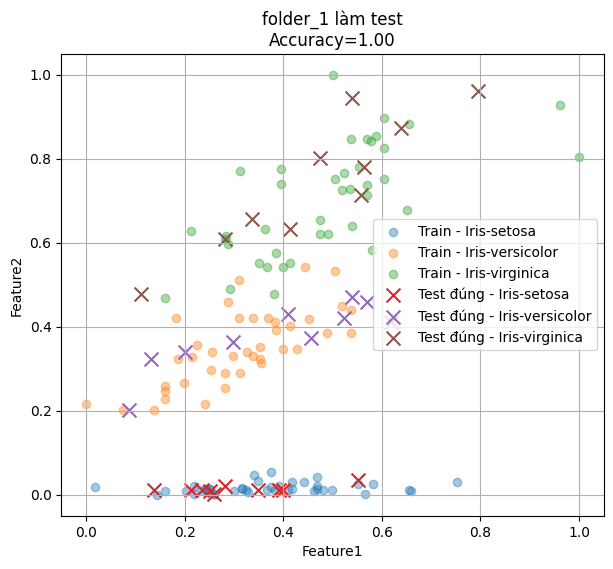


===== Test với folder_2 =====
Accuracy = 1.000


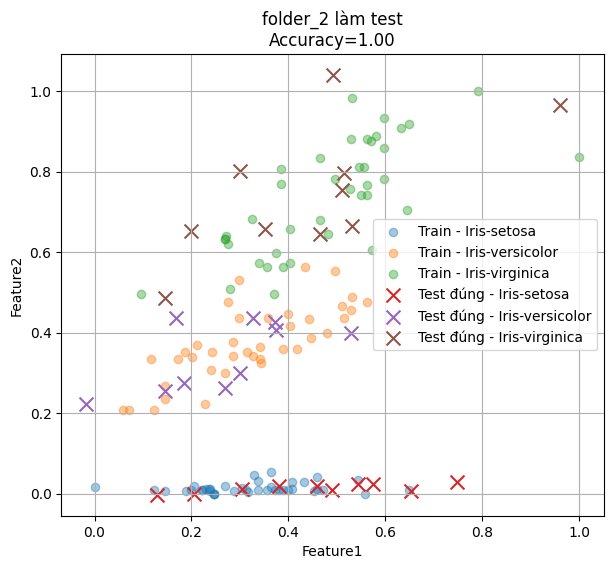


===== Test với folder_3 =====
Accuracy = 0.933


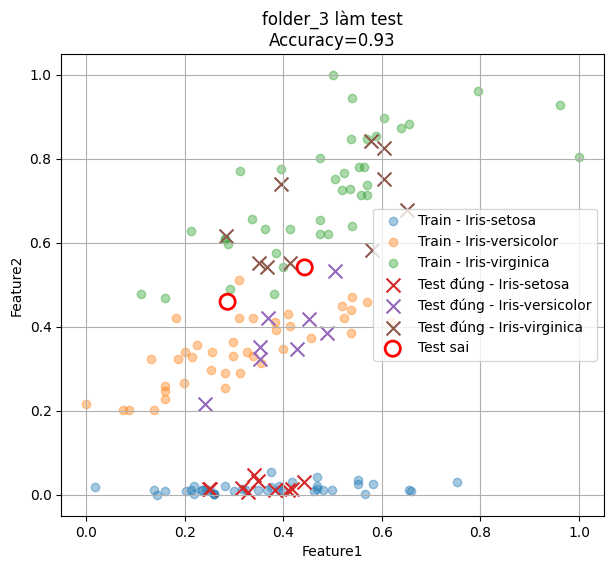


===== Test với folder_4 =====
Accuracy = 0.933


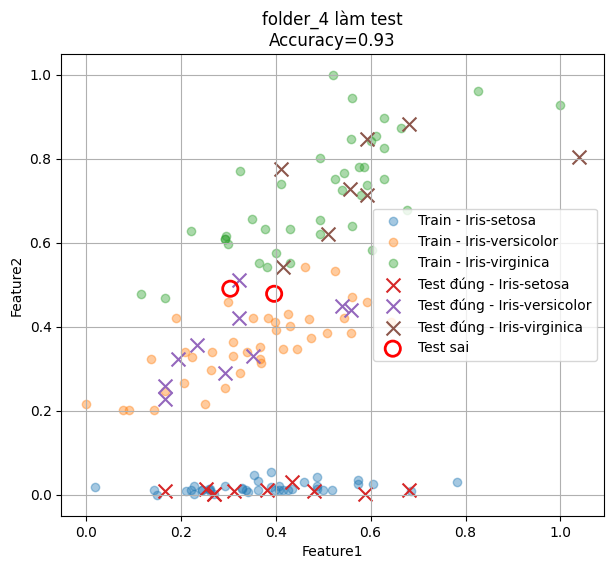


===== Test với folder_5 =====
Accuracy = 1.000


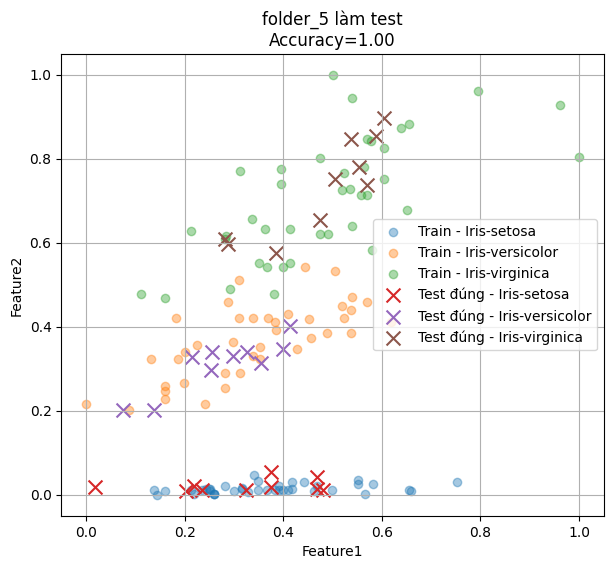

In [39]:

# === Cấu hình ===
base_dir = r"/media/pphong/D:/ML & DL/ML/AI_02/iris_folder"
folders = [f"folder_{i}" for i in range(1, 6)]
features = ["Feature1", "Feature2"]

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

# === Cross-validation 5 lần ===
for test_folder in folders:
    print(f"\n===== Test với {test_folder} =====")

    # Train data
    train_folders = [f for f in folders if f != test_folder]
    train_dfs = []
    for f in train_folders:
        folder_path = os.path.join(base_dir, f)
        csvs = [c for c in os.listdir(folder_path) if c.endswith(".csv")]
        if not csvs:
            raise FileNotFoundError(f"Không có CSV trong {folder_path}")
        train_dfs.append(pd.read_csv(os.path.join(folder_path, csvs[0])))
    train_df = pd.concat(train_dfs, ignore_index=True)

    # Test data
    test_path = os.path.join(base_dir, test_folder)
    test_csvs = [c for c in os.listdir(test_path) if c.endswith(".csv")]
    if not test_csvs:
        raise FileNotFoundError(f"Không có CSV trong {test_path}")
    test_df = pd.read_csv(os.path.join(test_path, test_csvs[0]))

    # Chuẩn hoá theo train
    min_vals = train_df[features].min()
    max_vals = train_df[features].max()
    train_df[features] = (train_df[features] - min_vals) / (max_vals - min_vals)
    test_df[features] = (test_df[features] - min_vals) / (max_vals - min_vals)

    # Template Matching
    preds = []
    for _, row in test_df.iterrows():
        test_feat = row[features].values
        dists = [(manhattan_distance(test_feat, tr[features].values), tr["Species"]) 
                 for _, tr in train_df.iterrows()]
        preds.append(min(dists, key=lambda x: x[0])[1])
    test_df["Predicted"] = preds

    # Accuracy
    acc = np.mean(test_df["Predicted"] == test_df["Species"])
    print(f"Accuracy = {acc:.3f}")

    # Vẽ scatter
    plt.figure(figsize=(7,6))

    # Train data: hình tròn nhạt
    for sp in train_df["Species"].unique():
        subset = train_df[train_df["Species"] == sp]
        plt.scatter(subset["Feature1"], subset["Feature2"], label=f"Train - {sp}", alpha=0.4)

    # Test data: phân biệt đúng/sai
    correct = test_df[test_df["Predicted"] == test_df["Species"]]
    wrong = test_df[test_df["Predicted"] != test_df["Species"]]

    # Test đúng → dấu X màu theo Species thật
    for sp in correct["Species"].unique():
        subset = correct[correct["Species"] == sp]
        plt.scatter(subset["Feature1"], subset["Feature2"], marker="x", s=100, label=f"Test đúng - {sp}")

    # Test sai → dấu ◯ màu đỏ
    if not wrong.empty:
        plt.scatter(wrong["Feature1"], wrong["Feature2"], marker="o", s=120, facecolors='none',
                    edgecolors='red', linewidths=2, label="Test sai")

    plt.xlabel("Feature1")
    plt.ylabel("Feature2")
    plt.title(f"{test_folder} làm test\nAccuracy={acc:.2f}")
    plt.legend()
    plt.grid(True)
    plt.show()


## 🧩 Nhận xét Cuối

Kết quả đánh giá mô hình **1-Nearest Neighbor (1-NN)** sử dụng **khoảng cách Manhattan** cho thấy độ chính xác trên tập dữ liệu *Iris* đạt mức cao, dao động quanh **97%** qua 5 lần cross-validation.  
Điều này chứng tỏ rằng trong không gian đặc trưng, các điểm dữ liệu của cùng một loài hoa nằm gần nhau — một đặc tính lý tưởng cho các thuật toán dựa trên khoảng cách.

### Ưu điểm
- Mô hình **đơn giản, dễ cài đặt** và không cần huấn luyện phức tạp.  
- **Hiệu quả** với dữ liệu có cấu trúc rõ ràng và ít nhiễu.  
- Giúp trực quan hóa rõ ràng ranh giới phân lớp giữa các nhóm dữ liệu.

### Hạn chế
- **Nhạy cảm với nhiễu** và điểm ngoại lai.  
- **Tốn chi phí tính toán** khi tập huấn luyện lớn, do phải tính khoảng cách đến mọi điểm.  
- Không thực sự “học” mà chỉ ghi nhớ dữ liệu.

Tóm lại, mô hình 1-NN với khoảng cách Manhattan là minh chứng điển hình cho triết lý “**đơn giản mà hiệu quả**” trong học máy. Nó không chỉ hữu ích để hiểu cách hoạt động của các mô hình dựa trên khoảng cách, mà còn là nền tảng để phát triển các thuật toán phức tạp hơn như K-NN hoặc metric learning.
